In [1]:
import sys
sys.path.append("../")

In [2]:
import os

import numpy as np
import pandas as pd
import joblib

from agents.matchmanager import buildMatchManager
from core.game import GameBoard, GameState, vectorState, vectorStateInfo
from core.vectors import vectorAction, vectorActionInfo, vectorBoard, vectorBoardInfo
from sklearn.ensemble import RandomForestRegressor

from datetime import datetime
from multiprocessing import Pool

import os.path as op
import random

import matplotlib.pyplot as plt
import pandas as pd
import yaml

from agents import GreedyAgent,RandomAgent
from agents.matchmanager import MatchManager
from agents.ml.classifier import ClassifierAgent
from agents.ml.regression import RegressionAgent
from core.const import RED, BLUE
from scenarios import scenarioJunction

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,4)

In [3]:
with open(op.join('.', '../logger.config.yaml'), 'r') as stream:
    config = yaml.load(stream, Loader=yaml.FullLoader)
#logging.config.dictConfig(config)

In [4]:
import logging.config


Functions definition:

In [5]:
def player(team:str, data:tuple, seed:int):
    if data[0] == 'gre':
        print(f'{team:5}-> GreedyAgent')
        return GreedyAgent(team, seed=seed)
    if data[0] == 'cls':
        print(f'{team:5}-> ClassifierAgent')
        return ClassifierAgent(team, data[1], seed=seed)
    if data[0] == 'reg':
        print(f'{team:5}-> RegressionAgent')
        return RegressionAgent(team, data[1], seed=seed)
    if data[0]=='ran':
        print(f'{team:5}-> RandomAgent')
        return RandomAgent(team, seed=seed)
        
    
    return None

In [6]:
def gameJunction(seed:int, red:tuple, blue:tuple) -> MatchManager:
    board, state = scenarioJunction()
    
    print('seed:   ', seed)
    
    playerRed = player(RED, red, seed)
    playerBlue = player(BLUE, blue, seed)

    mm = MatchManager(' ', playerRed, playerBlue, board, state, seed=seed)
    while not mm.end:
        mm.nextStep()
    
    print('winner: ', mm.winner)

    return mm

In [7]:
def prepareDataFrames(mm:MatchManager):
    df_states = pd.DataFrame(
        columns=vectorStateInfo(),
        data=[vectorState(x) for x in mm.states_history]
    )

    df_actions = pd.DataFrame(
        columns=vectorActionInfo(),
        data=[vectorAction(x) for x in mm.actions_history]
    )
    df_red = mm.red.createDataFrame()
    df_blue = mm.blue.createDataFrame()
    
    df_red = df_red.set_index('count')
    df_blue = df_blue.set_index('count')

    return df_red, df_blue, df_states, df_actions

Plot functions:

In [8]:
def plotEntropy(df, color:str):
    plt.figure()
    df.score.plot(color=color, marker='.')
    df.entropy.plot(color='purple')

    for i, row in df[['score','action']].reset_index().iterrows():
        dy, ha, va = (-0, 'center', 'top') if 'Respond' in row.action else (10, 'center', 'bottom')
        plt.annotate(row.action, (row['count'], row.score), ha=ha, va=va, rotation=90, textcoords="offset points", xytext=(0,dy))
        
    for x in df[['turn']].reset_index().groupby('turn').max().values.tolist():
        plt.axvline(x=x[0]+0.5, color='orange')

In [9]:
def plotContrast(df):
    df[df['team']=='red']['entropy'].plot(color='red'), df[df['team']=='blue']['entropy'].plot(color='blue')

Main analysis function:

In [10]:
def playAndAnalyze(seed:int, red_data, blue_data):  
    mm = gameJunction(seed, red_data, blue_data)
        
    df_red, df_blue, _, _ = prepareDataFrames(mm)
    
    plotEntropy(df_red, 'red')
    plotEntropy(df_blue, 'blue')
    
    return df_red, df_blue

In [11]:
red_models = [
    ('gre', ''),
    ('cls', '../models/Junction_RandomForestClassifier_red_20210217.joblib'),
    ('cls', '../models/Junction_RandomForestClassifier_20210217.joblib'),
    ('reg', '../models/Junction_RandomForestRegressor_red.joblib'),
    ('reg', '../models/Junction_RandomForestRegressor.joblib'),
]
blue_models = [
    ('gre', ''),
    ('cls', '../models/Junction_RandomForestClassifier_blue_20210217.joblib'),
    ('cls', '../models/Junction_RandomForestClassifier_20210217.joblib'),
    ('reg', '../models/Junction_RandomForestRegressor_blue.joblib'),
    ('reg', '../models/Junction_RandomForestRegressor.joblib'),

]

In [12]:
seed = 51

# Regressions

In [ ]:
playAndAnalyze(seed, red_models[3], blue_models[3]);

# Classifiers

seed:    51
red  -> ClassifierAgent
blue -> ClassifierAgent


No actions available: no response given
No actions available: no response given
No actions available: no response given


winner:  blue


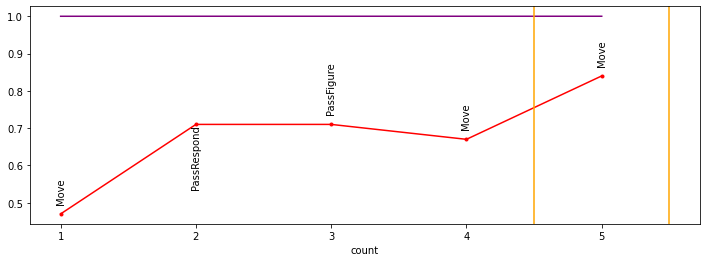

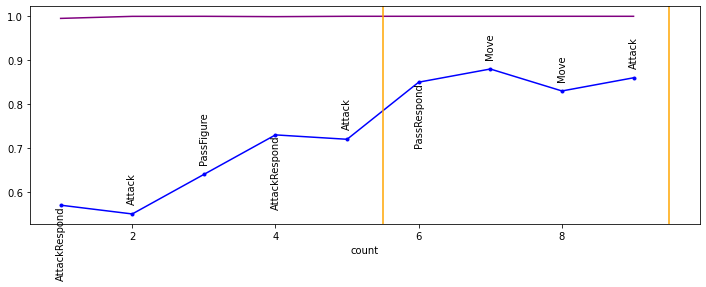

In [13]:
playAndAnalyze(seed, red_models[1], blue_models[1]);

# Greedy

In [ ]:
playAndAnalyze(seed, red_models[0], blue_models[0]);

# Tourney!

In [ ]:
random.seed(seed)

In [ ]:
s = random.randint(0, 1000000)
r = random.randint(0, len(red_models)-1)
b = random.randint(0, len(blue_models)-1)

playAndAnalyze(s, red_models[r], blue_models[b]);

In [ ]:
s = random.randint(0, 1000000)
r = random.randint(0, len(red_models)-1)
b = random.randint(0, len(blue_models)-1)

playAndAnalyze(s, red_models[r], blue_models[b]);

In [ ]:
s = random.randint(0, 1000000)
r = random.randint(0, len(red_models)-1)
b = random.randint(0, len(blue_models)-1)

playAndAnalyze(s, red_models[r], blue_models[b]);

In [ ]:
s = random.randint(0, 1000000)
r = random.randint(0, len(red_models)-1)
b = random.randint(0, len(blue_models)-1)

playAndAnalyze(s, red_models[r], blue_models[b]);

In [ ]:
s = random.randint(0, 1000000)
r = random.randint(0, len(red_models)-1)
b = random.randint(0, len(blue_models)-1)

playAndAnalyze(s, red_models[r], blue_models[b]);

In [ ]:
s = random.randint(0, 1000000)
r = random.randint(0, len(red_models)-1)
b = random.randint(0, len(blue_models)-1)

playAndAnalyze(s, red_models[r], blue_models[b]);

In [ ]:
s = random.randint(0, 1000000)
r = random.randint(0, len(red_models)-1)
b = random.randint(0, len(blue_models)-1)

playAndAnalyze(s, red_models[r], blue_models[b]);

In [ ]:
s = random.randint(0, 1000000)
r = random.randint(0, len(red_models)-1)
b = random.randint(0, len(blue_models)-1)

playAndAnalyze(s, red_models[r], blue_models[b]);

In [ ]:
s = random.randint(0, 1000000)
r = random.randint(0, len(red_models)-1)
b = random.randint(0, len(blue_models)-1)

playAndAnalyze(s, red_models[r], blue_models[b]);